# 서현님 "R" 확인 결과: 층, 건축년도 / 매칭구~ (거래금액, 전용면적 데이터는 버리기!)
'층', '건축년도'

In [87]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [88]:
data = pd.read_csv("./Raemian_final.csv")

In [89]:
data

,계약년월,층,건축년도,매칭 구,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),...,경제활동인구_고용률(단위: %),경제활동인구_취업자(단위: 천명),국제 주요국 주가지수(KOSPI),예금은행 대출금리(신규취급액 기준)_대출평균(연%),예금은행 대출금리(잔액 기준)_총대출(연리%),주택매매가격지수(KB)_서울,소비자물가지수_총지수(가중치:1000?),"원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원",경기종합지수,평당가
0,202101,7,2020,강남구,"10,589,107","6,436,523",97.0,"5,762","3,550","25,979.03",...,57.4,"25,818","2,976.21",2.72,2.80,89.828,101.04,"1,099.03",103.8,10848.124830
1,202105,18,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71",...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,10951.290050
2,202105,7,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71",...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,11919.951920
3,202105,18,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71",...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,10951.290050
4,202105,7,2020,강남구,"11,699,841","5,568,538",99.0,"11,307","2,814","21,924.71",...,61.2,"27,550","3,203.92",2.72,2.78,93.144,102.05,"1,123.39",106.3,11919.951920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7857,202011,5,2011,중구,"13,510,590","8,663,124",96.4,"9,619","5,807","26,045.45",...,60.7,"27,241","2,591.34",2.71,2.81,87.613,100.09,"1,115.20",102.6,5754.991630
7858,202012,5,2011,중구,"22,231,493","15,138,239",96.6,"12,063","6,694","34,654.82",...,59.1,"26,526","2,873.47",2.74,2.80,88.701,100.33,"1,094.50",103.1,5644.318714
7859,202012,13,2011,중구,"22,231,493","15,138,239",96.6,"12,063","6,694","34,654.82",...,59.1,"26,526","2,873.47",2.74,2.80,88.701,100.33,"1,094.50",103.1,5865.664546
7860,202012,2,2011,중구,"22,231,493","15,138,239",96.6,"12,063","6,694","34,654.82",...,59.1,"26,526","2,873.47",2.74,2.80,88.701,100.33,"1,094.50",103.1,4979.317486


In [90]:
data = data.dropna(subset=["아파트 건물면적_(천)"])

In [91]:
print(data["매칭 구"].unique())

['강남구' '강동구' '강북구' '광진구' '구로구' '노원구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구'
 '성북구' '송파구' '영등포구' '용산구' '은평구' '중구']


C:\Users\vivid\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


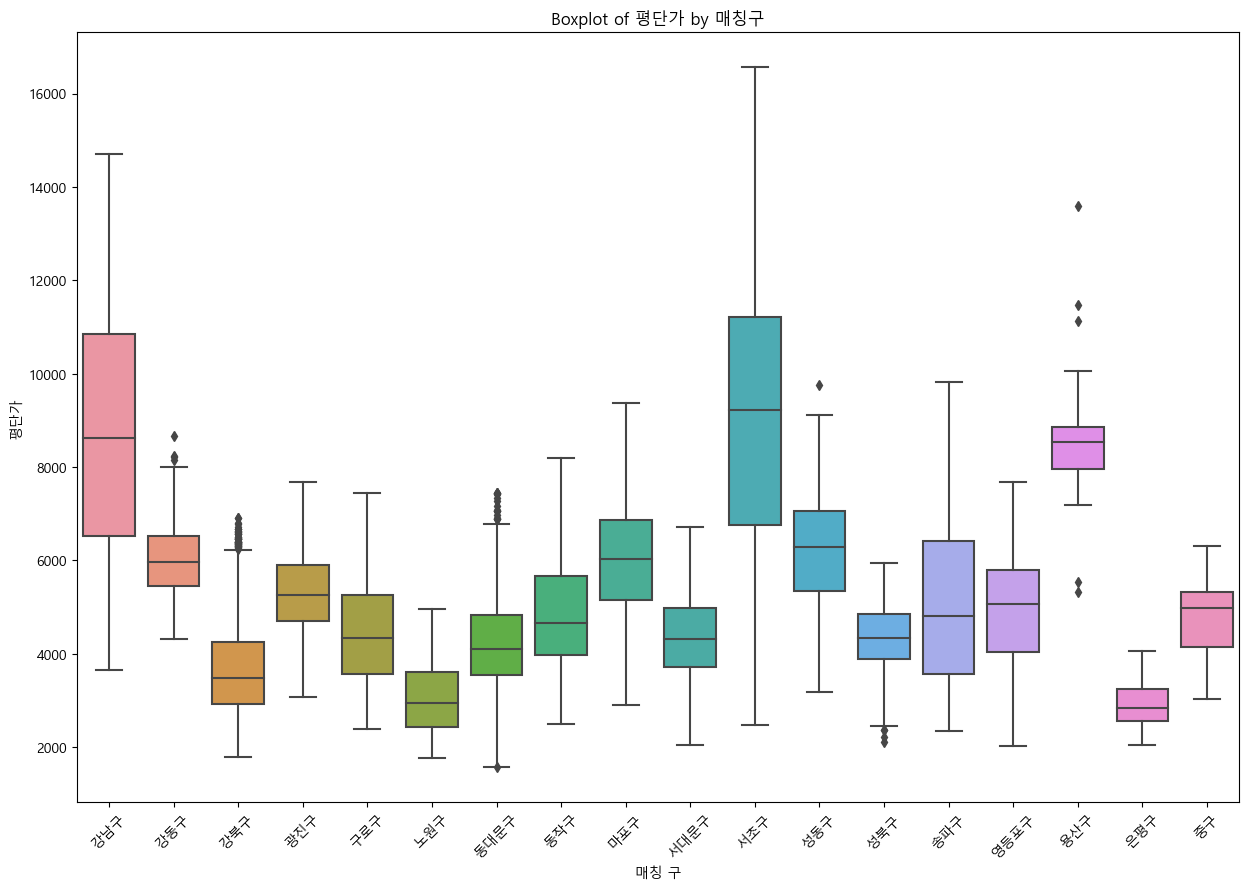

매칭 구
강남구     8674.190766
강동구     6020.704655
강북구     3565.862568
광진구     5374.208895
구로구     4463.724647
노원구     3045.084516
동대문구    4210.402684
동작구     4885.502032
마포구     6009.029707
서대문구    4367.872186
서초구     8796.497922
성동구     6220.425067
성북구     4354.266925
송파구     5047.022322
영등포구    4972.347437
용산구     8495.217728
은평구     2925.710608
중구      4784.369367
Name: 평당가, dtype: float64

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converting '평단가' to numeric (as it seems to be a string)
data['평당가'] = pd.to_numeric(data['평당가'], errors='coerce')

# Grouping data by '매칭구'
grouped_data = data.groupby('매칭 구')

# Creating boxplots for each group's '평단가' to visualize outliers
plt.figure(figsize=(15,10))
sns.boxplot(x='매칭 구', y='평당가', data=data)
plt.xticks(rotation=45)
plt.title('Boxplot of 평단가 by 매칭구')
plt.ylabel('평단가')
plt.xlabel('매칭 구')
plt.show()

# Identifying and removing outliers for each group in '평단가'
# Using IQR (Interquartile Range) method
cleaned_data = pd.DataFrame()
for name, group in grouped_data:
    Q1 = group['평당가'].quantile(0.25)
    Q3 = group['평당가'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group['평당가'] >= lower_bound) & (group['평당가'] <= upper_bound)]
    cleaned_data = pd.concat([cleaned_data, filtered_group], axis=0)

# Calculating the mean of '평단가' for each group in the cleaned data
mean_prices = cleaned_data.groupby('매칭 구')['평당가'].mean()
mean_prices


##이상치를 제거한, 0.25~0.75만 확인해보기!

하위 25% :  6519.08271975
상위 25% :  10841.615174999999
강남구 평균 평당가:  8674.190766238873
강남구 전체 개수 : 674
강남구 필터링 개수 674
이상치 개수(제거) : 0


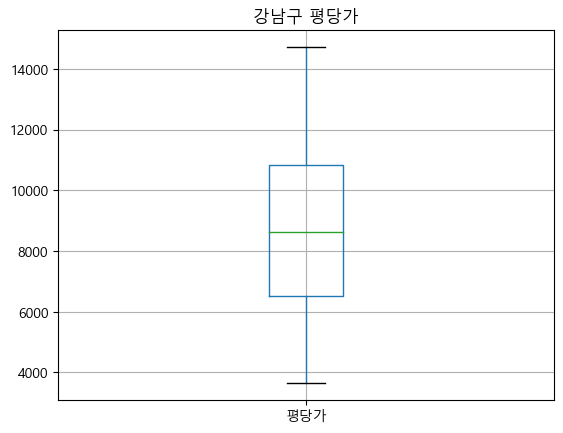

하위 25% :  5455.758576
상위 25% :  6526.8123027500005
강동구 평균 평당가:  6044.253665835898
강동구 전체 개수 : 390
강동구 필터링 개수 386
이상치 개수(제거) : 4


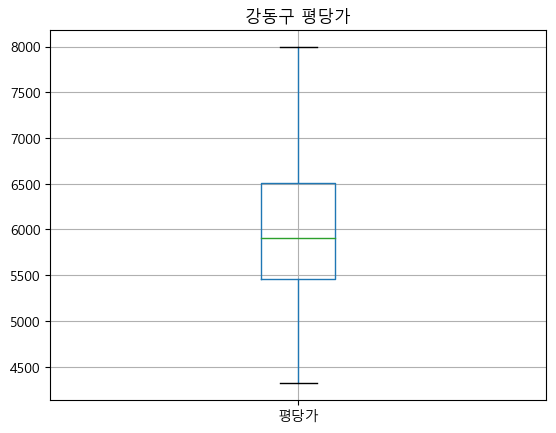

하위 25% :  2931.132837
상위 25% :  4252.277871
강북구 평균 평당가:  3727.2558246363637
강북구 전체 개수 : 814
강북구 필터링 개수 769
이상치 개수(제거) : 45


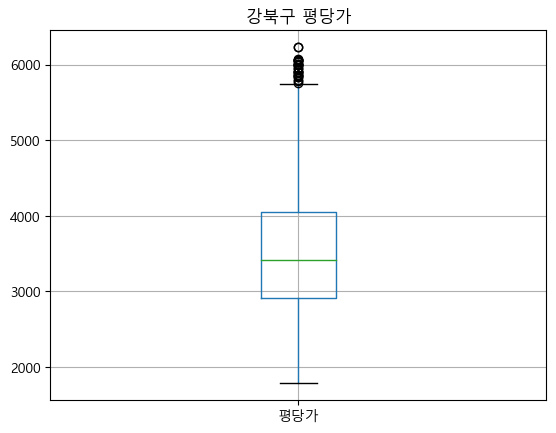

하위 25% :  4697.28583175
상위 25% :  5904.9360154999995
광진구 평균 평당가:  5374.2088954711535
광진구 전체 개수 : 312
광진구 필터링 개수 312
이상치 개수(제거) : 0


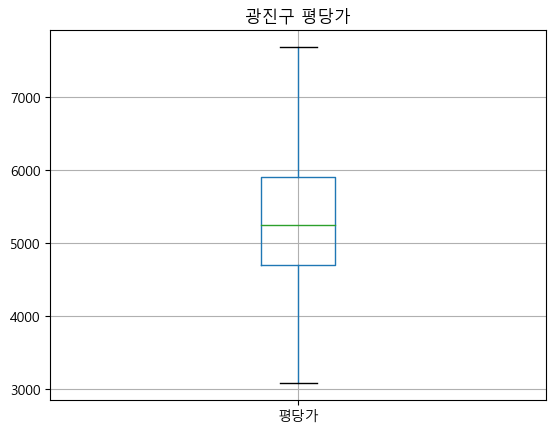

하위 25% :  3558.4684585
상위 25% :  5249.0108245
구로구 평균 평당가:  4463.72464747482
구로구 전체 개수 : 278
구로구 필터링 개수 278
이상치 개수(제거) : 0


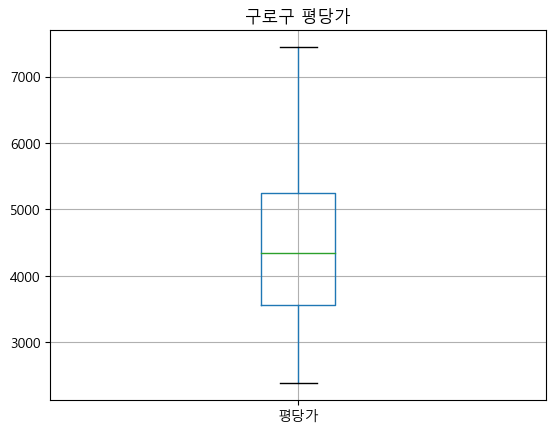

하위 25% :  2441.193268
상위 25% :  3619.616893
노원구 평균 평당가:  3045.084515879699
노원구 전체 개수 : 133
노원구 필터링 개수 133
이상치 개수(제거) : 0


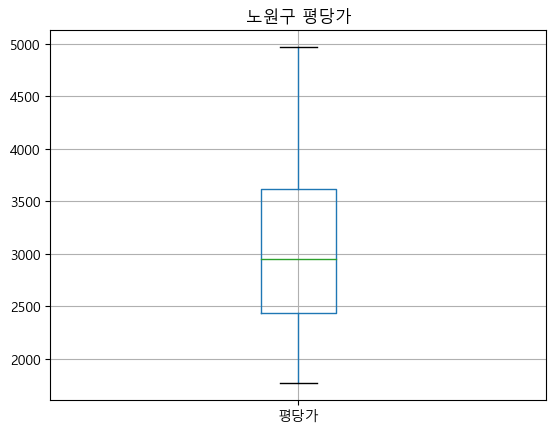

하위 25% :  3536.076181
상위 25% :  4839.84371
동대문구 평균 평당가:  4269.105376883807
동대문구 전체 개수 : 809
동대문구 필터링 개수 791
이상치 개수(제거) : 18


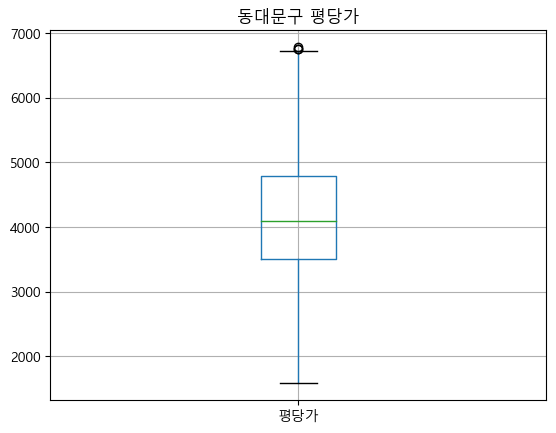

하위 25% :  3969.4585429999997
상위 25% :  5661.3387875
동작구 평균 평당가:  4885.502032334135
동작구 전체 개수 : 416
동작구 필터링 개수 416
이상치 개수(제거) : 0


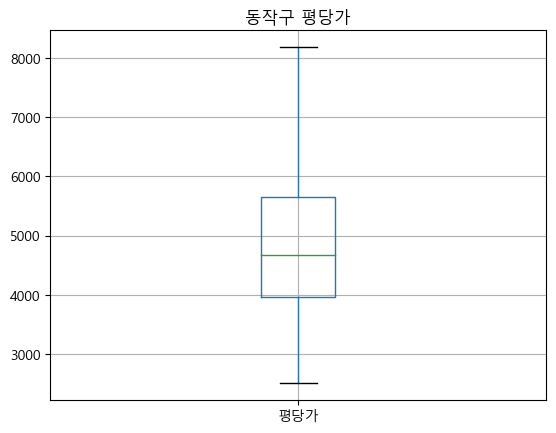

하위 25% :  5152.6898012500005
상위 25% :  6869.2963715
마포구 평균 평당가:  6009.029707302026
마포구 전체 개수 : 1086
마포구 필터링 개수 1086
이상치 개수(제거) : 0


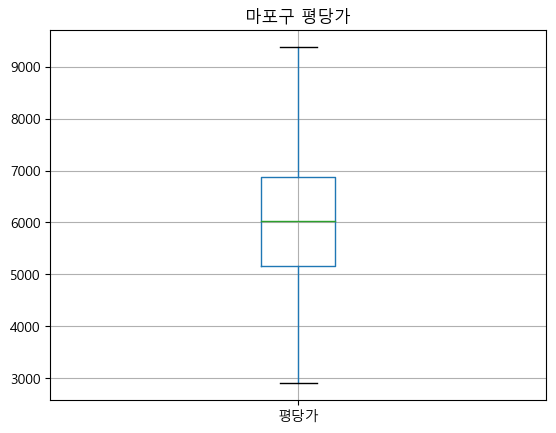

하위 25% :  3726.3499935
상위 25% :  4977.1844615
서대문구 평균 평당가:  4367.872186043783
서대문구 전체 개수 : 571
서대문구 필터링 개수 571
이상치 개수(제거) : 0


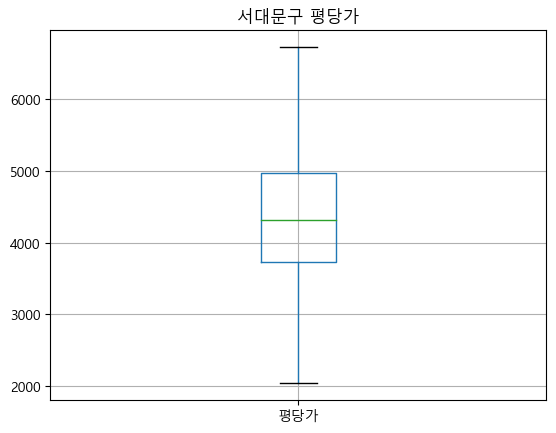

하위 25% :  6755.6424535
상위 25% :  11209.987907499999
서초구 평균 평당가:  8796.497922007247
서초구 전체 개수 : 552
서초구 필터링 개수 552
이상치 개수(제거) : 0


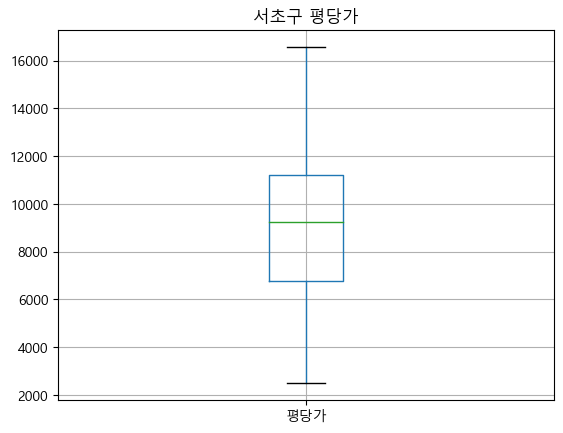

하위 25% :  5336.01327075
상위 25% :  7064.8746785
성동구 평균 평당가:  6235.966914517546
성동구 전체 개수 : 228
성동구 필터링 개수 227
이상치 개수(제거) : 1


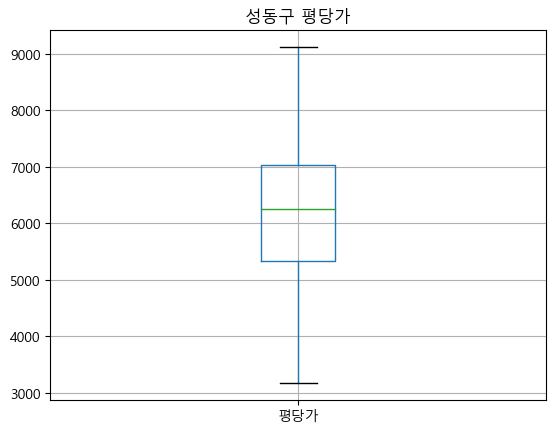

하위 25% :  3884.6621715
상위 25% :  4862.614733
성북구 평균 평당가:  4342.4642461327685
성북구 전체 개수 : 708
성북구 필터링 개수 704
이상치 개수(제거) : 4


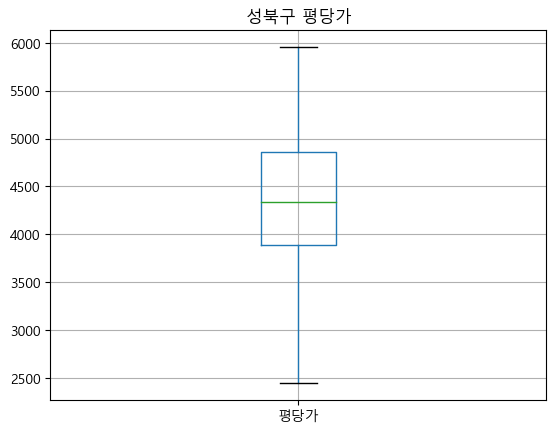

하위 25% :  3569.255685
상위 25% :  6425.230734
송파구 평균 평당가:  5047.022322
송파구 전체 개수 : 261
송파구 필터링 개수 261
이상치 개수(제거) : 0


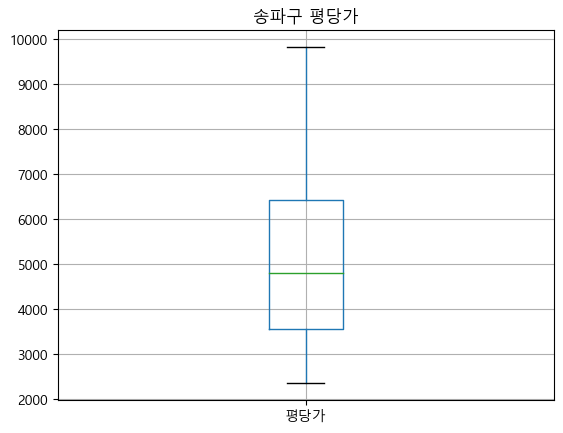

하위 25% :  4033.98039075
상위 25% :  5792.14722
영등포구 평균 평당가:  4972.3474368368425
영등포구 전체 개수 : 380
영등포구 필터링 개수 380
이상치 개수(제거) : 0


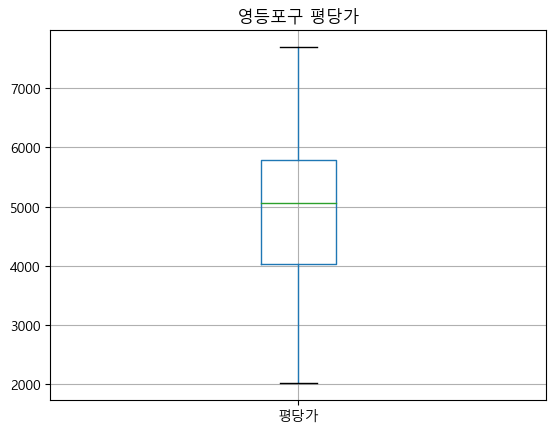

하위 25% :  7963.668933999999
상위 25% :  8852.631994
용산구 평균 평당가:  8612.104386051282
용산구 전체 개수 : 39
용산구 필터링 개수 34
이상치 개수(제거) : 5


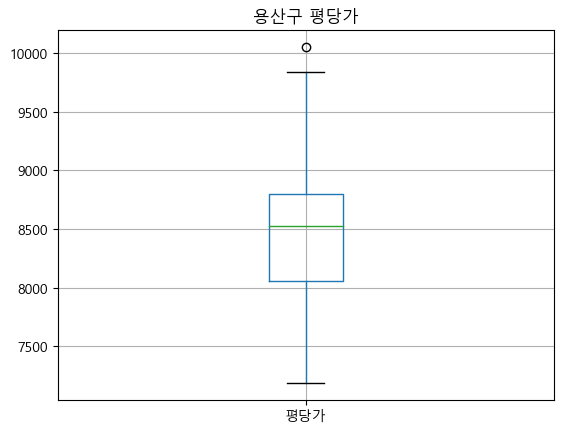

하위 25% :  2555.272855
상위 25% :  3253.586752
은평구 평균 평당가:  2925.7106077837834
은평구 전체 개수 : 37
은평구 필터링 개수 37
이상치 개수(제거) : 0


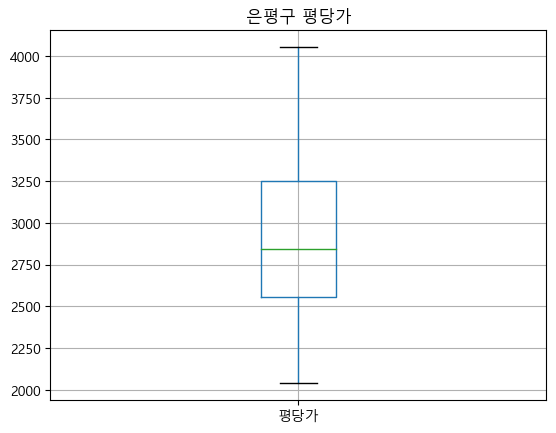

하위 25% :  nan
상위 25% :  nan
양천구 평균 평당가:  nan
양천구 전체 개수 : 0
양천구 필터링 개수 0
이상치 개수(제거) : 0


C:\Users\vivid\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


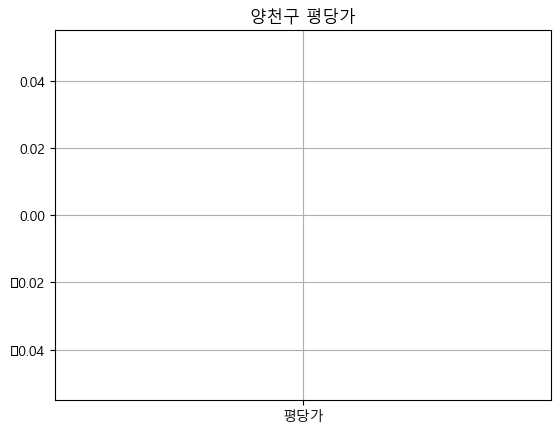

하위 25% :  4139.5447805
상위 25% :  5329.425747
중구 평균 평당가:  4784.369367253731
중구 전체 개수 : 67
중구 필터링 개수 67
이상치 개수(제거) : 0


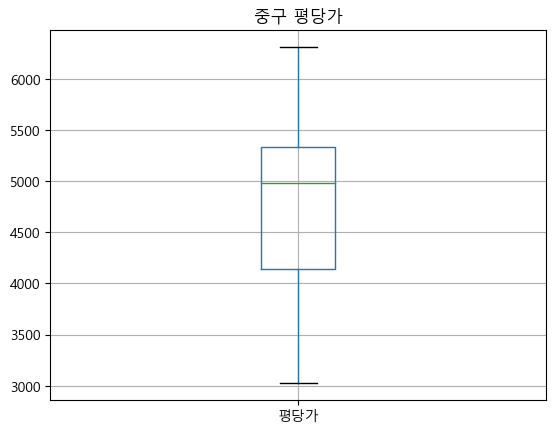

---------------------------------------
전체 시각화


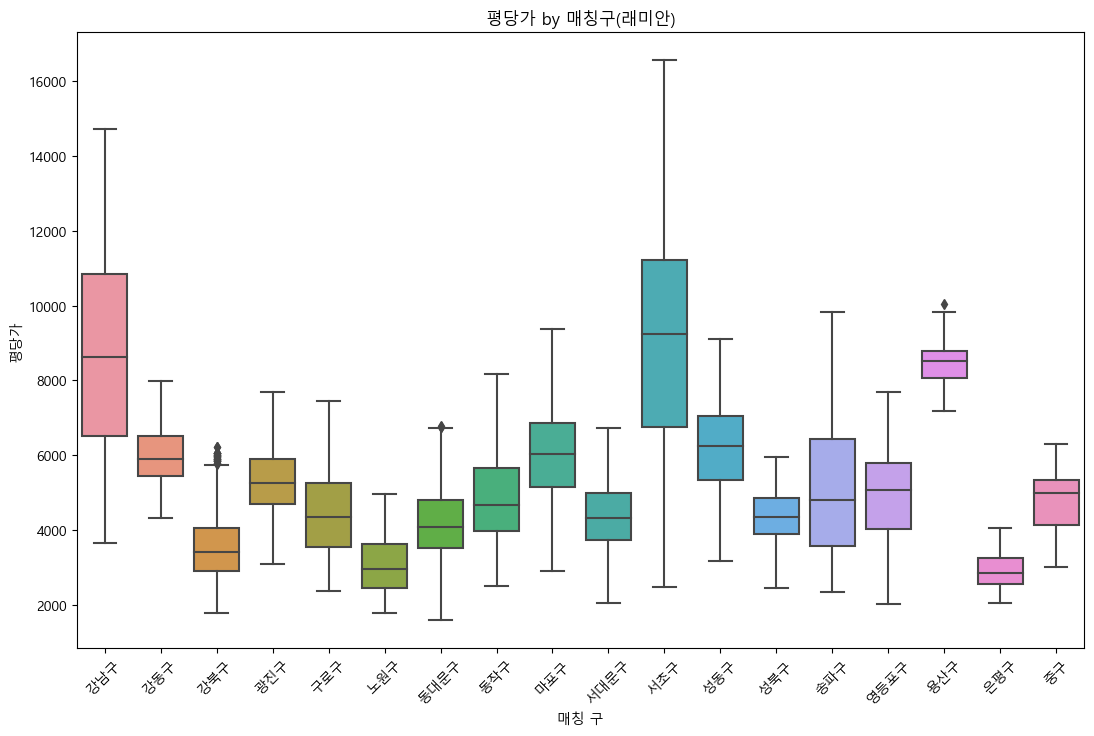

In [93]:
'''
매칭구, 각 구별 총 개수, 각 구별 이상치 개수, 각 구별 시각화, 각 구별 평단가, 전체 시각화
'''
filtered_data_total = pd.DataFrame()
def visualize(data, group):
    data = data[data['매칭 구'] == group]
    # low_limit = data["평당가"].quantile(0.25)
    # upper_limit = data['평당가'].quantile(0.75)

    Q1 = data["평당가"].quantile(0.25)
    Q3 = data["평당가"].quantile(0.75)
    IQR = Q3 - Q1
    

    # filtered_data = data[(data["평당가"] >= low_limit) & (data["평당가"] <= upper_limit)] #형준 수식(무작정 지우는 것)
    filtered_data = data[~((data['평당가'] < (Q1 - 1.5 * IQR)) | (data['평당가'] > (Q3 + 1.5 * IQR)))] #희진 수식
    #튀어나오는 값 있지만, 정상 범위내에 있다고 판단.
    global filtered_data_total
    filtered_data_total = pd.concat([filtered_data_total, filtered_data], ignore_index=True)
    
    outliers_count = len(data) - len(filtered_data)

    filtered_data_total.append(data, ignore_index=True)
    
    print("하위 25% : ", Q1)
    print("상위 25% : ", Q3)
    print(f"{group} 평균 평당가: ", data['평당가'].mean())
    print(f"{group} 전체 개수 :", len(data))
    print(f"{group} 필터링 개수", len(filtered_data))
    print("이상치 개수(제거) :", outliers_count) #이미 정수 개수




    #개별 box plot 그리기
    filtered_data.boxplot(column = "평당가")
    plt.title(f"{group} 평당가") #0.25~0.75% 사이 1차 필터링
    plt.show()

group = ['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '영등포구', '용산구', '은평구', '양천구', '중구']

for i in group:
    visualize(data, i)

print("---------------------------------------")
print("전체 시각화")


plt.figure(figsize=(13,8))
sns.boxplot(x="매칭 구", y="평당가", data=filtered_data_total)
plt.xticks(rotation = 45)
plt.title("평당가 by 매칭구(래미안)")
plt.ylabel("평당가")
plt.xlabel("매칭 구")
plt.show()



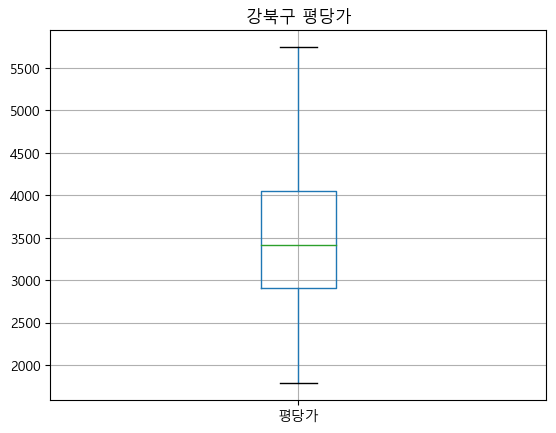

In [94]:
#데이터 문제 없이 이상치 제거
group_data = filtered_data_total[filtered_data_total["매칭 구"] == "강북구"]

group_data.boxplot(column = "평당가", showfliers=False)
plt.title("강북구 평당가")
plt.show()

# group_data.to_csv("./강북구.csv")

##filtered_data_total = data로 다시 수정해주기

In [95]:
data = filtered_data_total

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7678 entries, 0 to 7677
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7678 non-null   int64  
 1   층                                   7678 non-null   int64  
 2   건축년도                                7678 non-null   int64  
 3   매칭 구                                7678 non-null   object 
 4   건설수주_건축(단위 백만원)                     7678 non-null   object 
 5   건설수주_주택(단위 백만원)                     7678 non-null   object 
 6   매매가격지수(아파트)                         7678 non-null   float64
 7   경상수지(백만불)                           7678 non-null   object 
 8   무역수지(백만불)                           7678 non-null   object 
 9   대출금액(아파트)(억원)                       7678 non-null   object 
 10  대출잔액(아파트)(억원)                       7678 non-null   object 
 11  서울_신규_분양세대(단위: 세대)                  7678 no

In [97]:
# object -> float 형으로 데이터타입 변환
# transaction_fee = data['거래금액(만원)']
CO_architecture = data['건설수주_건축(단위 백만원)']
CO_dwellinghouse = data['건설수주_주택(단위 백만원)']
current_balance = data['경상수지(백만불)']
trade_balance = data['무역수지(백만불)']
loan_amount = data['대출금액(아파트)(억원)']
loan_balance = data['대출잔액(아파트)(억원)']
Newly_Offered_Housing_Units_in_Seoul = data['서울_신규_분양세대(단위: 세대)']
employed_person = data['경제활동인구_취업자(단위: 천명)']
KOSPI = data['국제 주요국 주가지수(KOSPI)']
KRW_to_USD = data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원']

# transaction_fee_comma_removed = transaction_fee.apply(lambda x: x.replace(',', ''))
# data['거래금액(만원)'] = transaction_fee_comma_removed.astype(float)
CO_architecture_comma_removed = CO_architecture.apply(lambda x: x.replace(',', ''))
data['건설수주_건축(단위 백만원)'] = CO_architecture_comma_removed.astype(float)
CO_dwellinghouse_comma_removed = CO_dwellinghouse.apply(lambda x: x.replace(',', ''))
data['건설수주_주택(단위 백만원)'] = CO_dwellinghouse_comma_removed.astype(float)
current_balance_comma_removed = current_balance.apply(lambda x: x.replace(',', ''))
data['경상수지(백만불)'] = current_balance_comma_removed.astype(float)
trade_balance_comma_removed = trade_balance.apply(lambda x: x.replace(',', ''))
data['무역수지(백만불)'] = trade_balance_comma_removed.astype(float)
loan_amount_comma_removed = loan_amount.apply(lambda x: x.replace(',', ''))
data['대출금액(아파트)(억원)'] = loan_amount_comma_removed.astype(float)
loan_balance_comma_removed = loan_balance.apply(lambda x: x.replace(',', ''))
data['대출잔액(아파트)(억원)'] = loan_balance_comma_removed.astype(float)
Newly_Offered_Housing_Units_in_Seoul_comma_removed = Newly_Offered_Housing_Units_in_Seoul.apply(lambda x: x.replace(',', ''))
data['서울_신규_분양세대(단위: 세대)'] = Newly_Offered_Housing_Units_in_Seoul_comma_removed.astype(float)
employed_person_comma_removed = employed_person.apply(lambda x: x.replace(',', ''))
data['경제활동인구_취업자(단위: 천명)'] = employed_person_comma_removed.astype(float)
KOSPI_comma_removed = KOSPI.apply(lambda x: x.replace(',', ''))
data['국제 주요국 주가지수(KOSPI)'] = KOSPI_comma_removed.astype(float)
KRW_to_USD_comma_removed = KRW_to_USD.apply(lambda x: x.replace(',', ''))
data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원'] = KRW_to_USD_comma_removed.astype(float)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7678 entries, 0 to 7677
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7678 non-null   int64  
 1   층                                   7678 non-null   int64  
 2   건축년도                                7678 non-null   int64  
 3   매칭 구                                7678 non-null   object 
 4   건설수주_건축(단위 백만원)                     7678 non-null   float64
 5   건설수주_주택(단위 백만원)                     7678 non-null   float64
 6   매매가격지수(아파트)                         7678 non-null   float64
 7   경상수지(백만불)                           7678 non-null   float64
 8   무역수지(백만불)                           7678 non-null   float64
 9   대출금액(아파트)(억원)                       7678 non-null   float64
 10  대출잔액(아파트)(억원)                       7678 non-null   float64
 11  서울_신규_분양세대(단위: 세대)                  7678 no

# 정규화

In [99]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

ohe = OneHotEncoder(sparse=False)

data_apt_name = ohe.fit_transform(data[['매칭 구']])
#data_road_name = ohe.fit_transform(data[['도로명']])
#data_matching_gu = ohe.fit_transform(data[['매칭 구']])

In [100]:
data_apt_name

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [101]:
ohe.categories_

[array(['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구',
        '서대문구', '서초구', '성동구', '성북구', '송파구', '영등포구', '용산구', '은평구', '중구'],
       dtype=object)]

In [102]:
df_apt_name = pd.DataFrame(data_apt_name, columns=[col for col in ohe.categories_[0]])

In [103]:
data = data[["층", "건축년도", "평당가", "매칭 구"]]

In [104]:
data = pd.concat([data.drop(columns=['매칭 구']), df_apt_name], axis=1)

In [105]:
data

,층,건축년도,평당가,강남구,강동구,강북구,광진구,구로구,노원구,동대문구,...,마포구,서대문구,서초구,성동구,성북구,송파구,영등포구,용산구,은평구,중구
0,7,2020,10848.124830,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18,2020,10951.290050,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,2020,11919.951920,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18,2020,10951.290050,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,2020,11919.951920,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7673,5,2011,5754.991630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7674,5,2011,5644.318714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7675,13,2011,5865.664546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7676,2,2011,4979.317486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [106]:
ohe.categories_

[array(['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구',
        '서대문구', '서초구', '성동구', '성북구', '송파구', '영등포구', '용산구', '은평구', '중구'],
       dtype=object)]

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7678 entries, 0 to 7677
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   층       7678 non-null   int64  
 1   건축년도    7678 non-null   int64  
 2   평당가     7678 non-null   float64
 3   강남구     7678 non-null   float64
 4   강동구     7678 non-null   float64
 5   강북구     7678 non-null   float64
 6   광진구     7678 non-null   float64
 7   구로구     7678 non-null   float64
 8   노원구     7678 non-null   float64
 9   동대문구    7678 non-null   float64
 10  동작구     7678 non-null   float64
 11  마포구     7678 non-null   float64
 12  서대문구    7678 non-null   float64
 13  서초구     7678 non-null   float64
 14  성동구     7678 non-null   float64
 15  성북구     7678 non-null   float64
 16  송파구     7678 non-null   float64
 17  영등포구    7678 non-null   float64
 18  용산구     7678 non-null   float64
 19  은평구     7678 non-null   float64
 20  중구      7678 non-null   float64
dtypes: float64(19), int64(2)
memory usage

# 조건: 계약년도 scaler 진행하였음

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data.iloc[:, :3].values) #평당가 까지만 scaler 진행
oh_data = data.iloc[:, 4 : 22]

In [109]:
data_std

array([[-0.57393577,  1.69748363,  2.42074345],
       [ 1.01405661,  1.69748363,  2.46704085],
       [-0.57393577,  1.69748363,  2.90174668],
       ...,
       [ 0.29224189,  0.3274663 ,  0.1847676 ],
       [-1.29575049,  0.3274663 , -0.21299787],
       [-0.14084694,  0.3274663 , -0.23892428]])

In [110]:
oh_data

,강동구,강북구,광진구,구로구,노원구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,영등포구,용산구,은평구,중구
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## scaler 한 데이터와 one hot encoding한 데이터 합치기

In [115]:
# data_std (NumPy 배열)를 DataFrame으로 변환
# 여기서 columns는 data_std의 열 이름을 지정합니다 (예: ['col1', 'col2', ..., 'colN'])
data_std= pd.DataFrame(data_std)
data_std.rename(columns={0: "층", 1: "건축년도", 2: "평당가"}, inplace=True)
# data_std_df와 oh_data를 가로 방향으로 결합
scaled_df = pd.concat([data_std, oh_data], axis=1)


In [116]:
scaled_df

,층,건축년도,평당가,강동구,강북구,광진구,구로구,노원구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,영등포구,용산구,은평구,중구
0,-0.573936,1.697484,2.420743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.014057,1.697484,2.467041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.573936,1.697484,2.901747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.014057,1.697484,2.467041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.573936,1.697484,2.901747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7673,-0.862662,0.327466,0.135101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7674,-0.862662,0.327466,0.085434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7675,0.292242,0.327466,0.184768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7676,-1.295750,0.327466,-0.212998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error, r2_score


In [118]:
#target
y = scaled_df.iloc[:, 2]

#train
X = scaled_df.drop(scaled_df.columns[2], axis=1)

In [119]:
y

0       2.420743
1       2.467041
2       2.901747
3       2.467041
4       2.901747
          ...   
7673    0.135101
7674    0.085434
7675    0.184768
7676   -0.212998
7677   -0.238924
Name: 평당가, Length: 7678, dtype: float64

In [120]:
X

,층,건축년도,강동구,강북구,광진구,구로구,노원구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,영등포구,용산구,은평구,중구
0,-0.573936,1.697484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.014057,1.697484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.573936,1.697484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.014057,1.697484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.573936,1.697484,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7673,-0.862662,0.327466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7674,-0.862662,0.327466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7675,0.292242,0.327466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7676,-1.295750,0.327466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [121]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(X, y, test_size = 0.2, random_state=42)

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error, r2_score


In [123]:
print(X.shape)
print(y.shape)

(7678, 19)
(7678,)


In [124]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(4606, 19) (1536, 19) (1536, 19) (4606,) (1536,) (1536,)


In [125]:
from tarfile import XGLTYPE
#학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (xgboost.sklearn으로 해야지 sklearn으로 학습 할 수 있는 라이브러리를 불러옴)
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM

#평가지표
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [126]:
import re

def preprocess_dataframes(*dataframes):
    processed_dfs = []
    for df in dataframes:
        processed_df = df.copy()
        # 정규 표현식을 사용하여 불필요한 문자 제거
        processed_df.columns = [re.sub(r'[^\w\s]', '', col).replace(' ', '_') for col in processed_df.columns]
        processed_dfs.append(processed_df)
    return processed_dfs

# 데이터 전처리 적용
X_train_processed, X_val_processed, X_test_processed = preprocess_dataframes(X_train, X_val, X_test)


In [127]:
#모델 훈련 함수
def train_models(X_train, y_train):
    models = {
        "LinearRegression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "XGBRegressor": XGBRegressor(),
        "LGBMRegressor": LGBMRegressor()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model

    return models


In [128]:
#결과 시각화 함수
def evaluate_models(models, X_train, y_train, X_val, y_val):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}    \tTrain MSE\t\tVal MSE    \t\tTrain R²\tVal R²"
    print(header)
    print("-" * len(header))

    for name, model in models.items():
        pred_train = model.predict(X_train)
        pred_val = model.predict(X_val)

        mse_train = mean_squared_error(y_train, pred_train)
        mse_val = mean_squared_error(y_val, pred_val)
        r2_train = r2_score(y_train, pred_train)
        r2_val = r2_score(y_val, pred_val)

        print(f"{name.ljust(max_name_length)}\t{mse_train:.4f}\t\t{mse_val:.4f}\t\t{r2_train:.2f}\t\t{r2_val:.2f}")


In [129]:
#train, val 시각화 함수
def plot_mse_for_models_line(models, X_train, y_train, X_val, y_val):
    # 모델별 MSE 저장을 위한 리스트
    train_mse_list = []
    val_mse_list = []
    model_names = []

    # 각 모델별로 MSE 계산
    for name, model in models.items():
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

        train_mse = mean_squared_error(y_train, train_pred)
        val_mse = mean_squared_error(y_val, val_pred)

        train_mse_list.append(train_mse)
        val_mse_list.append(val_mse)
        model_names.append(name)

    # 선형 그래프로 MSE 결과 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(model_names, train_mse_list, marker='o', label='Training MSE')
    plt.plot(model_names, val_mse_list, marker='o', label='Validation MSE')

    plt.ylabel('MSE')
    plt.title('Training and Validation MSE for Different Models')
    plt.legend()

    plt.show()


In [130]:
#모델 test 평가 함수
def evaluate_models_on_test(models, X_test, y_test):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Test Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}\tTest MSE\t\tTest R²"
    print(header)
    print("---------------------------------------------------------")

    for name, model in models.items():
        pred_test = model.predict(X_test)

        mse_test = mean_squared_error(y_test, pred_test)
        r2_test = r2_score(y_test, pred_test)

        print(f"{name.ljust(max_name_length)}\t{mse_test:.4f}\t\t{r2_test * 100:.2f}%")

In [131]:
#데이터 전처리
X_train_processed, X_val_processed, X_test_processed = preprocess_dataframes(X_train, X_val, X_test)

In [132]:
#모델 훈련
models = train_models(X_train_processed, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 4606, number of used features: 19
[LightGBM] [Info] Start training from score -0.024123


In [133]:
#모델 성능평가
evaluate_models(models, X_train_processed, y_train, X_val_processed, y_val)

Model Performance Evaluation:

Model                	Train MSE		Val MSE    		Train R²	Val R²
-------------------------------------------------------------
LinearRegression 	0.3428		0.3690		0.64		0.64
Lasso            	0.9559		1.0291		0.00		-0.00
Ridge            	0.3432		0.3706		0.64		0.64
XGBRegressor     	0.1703		0.2787		0.82		0.73
LGBMRegressor    	0.1813		0.2539		0.81		0.75


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 102
[LightGBM] [Info] Number of data points in the train set: 4606, number of used features: 19
[LightGBM] [Info] Start training from score -0.024123


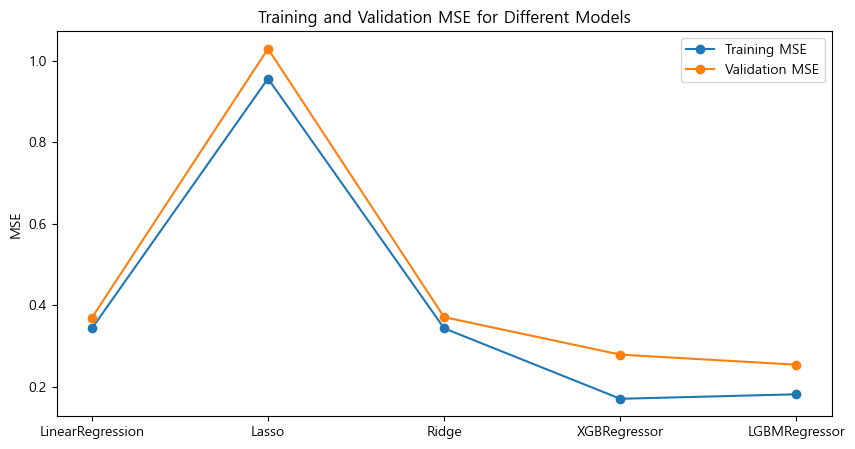

In [134]:
#결과 시각화
plot_mse_for_models_line(models, X_train_processed, y_train, X_val_processed, y_val)

In [135]:
#모델 test평가
evaluate_models_on_test(models, X_test_processed, y_test)

Model Test Performance Evaluation:

Model            	Test MSE		Test R²
---------------------------------------------------------
LinearRegression 	0.3746		65.94%
Lasso            	1.1059		-0.57%
Ridge            	0.3772		65.70%
XGBRegressor     	0.2405		78.13%
LGBMRegressor    	0.2177		80.20%


In [136]:
X_train.columns

Index(['층', '건축년도', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구',
       '서대문구', '서초구', '성동구', '성북구', '송파구', '영등포구', '용산구', '은평구', '중구'],
      dtype='object')

#xgboost early stop

[0]	validation_0-rmse:0.89646	validation_1-rmse:0.92224
[1]	validation_0-rmse:0.76699	validation_1-rmse:0.80006
[2]	validation_0-rmse:0.68590	validation_1-rmse:0.72932
[3]	validation_0-rmse:0.63749	validation_1-rmse:0.68641
[4]	validation_0-rmse:0.59361	validation_1-rmse:0.64594
[5]	validation_0-rmse:0.56243	validation_1-rmse:0.62194
[6]	validation_0-rmse:0.54002	validation_1-rmse:0.60187
[7]	validation_0-rmse:0.52601	validation_1-rmse:0.59173
[8]	validation_0-rmse:0.51805	validation_1-rmse:0.58445
[9]	validation_0-rmse:0.51319	validation_1-rmse:0.57949
[10]	validation_0-rmse:0.50611	validation_1-rmse:0.57193
[11]	validation_0-rmse:0.49981	validation_1-rmse:0.56748
[12]	validation_0-rmse:0.49442	validation_1-rmse:0.56338
[13]	validation_0-rmse:0.49176	validation_1-rmse:0.56166
[14]	validation_0-rmse:0.48959	validation_1-rmse:0.56066
[15]	validation_0-rmse:0.48711	validation_1-rmse:0.55855
[16]	validation_0-rmse:0.48331	validation_1-rmse:0.55587
[17]	validation_0-rmse:0.48116	validation

c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[32]	validation_0-rmse:0.45785	validation_1-rmse:0.53973
[33]	validation_0-rmse:0.45685	validation_1-rmse:0.53939
[34]	validation_0-rmse:0.45420	validation_1-rmse:0.53886
[35]	validation_0-rmse:0.45344	validation_1-rmse:0.53854
[36]	validation_0-rmse:0.45260	validation_1-rmse:0.53790
[37]	validation_0-rmse:0.45142	validation_1-rmse:0.53770
[38]	validation_0-rmse:0.45073	validation_1-rmse:0.53753
[39]	validation_0-rmse:0.44972	validation_1-rmse:0.53743
[40]	validation_0-rmse:0.44775	validation_1-rmse:0.53663
[41]	validation_0-rmse:0.44732	validation_1-rmse:0.53595
[42]	validation_0-rmse:0.44673	validation_1-rmse:0.53569
[43]	validation_0-rmse:0.44538	validation_1-rmse:0.53543
[44]	validation_0-rmse:0.44416	validation_1-rmse:0.53529
[45]	validation_0-rmse:0.44246	validation_1-rmse:0.53454
[46]	validation_0-rmse:0.44189	validation_1-rmse:0.53432
[47]	validation_0-rmse:0.44126	validation_1-rmse:0.53452
[48]	validation_0-rmse:0.44043	validation_1-rmse:0.53454
[49]	validation_0-rmse:0.43885	

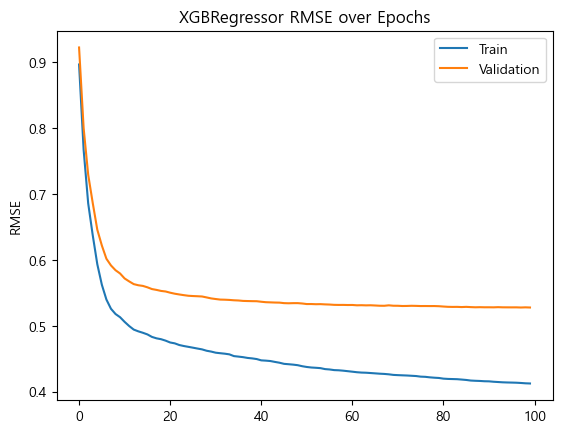

Xgboost Best Epoch:  99


In [137]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


reg_xgb = XGBRegressor()
eval_set = [(X_train_processed, y_train), (X_val_processed, y_val)]
reg_xgb.fit(X_train_processed, y_train, eval_metric="rmse", eval_set=eval_set,
            early_stopping_rounds=10, verbose=True)
# Accessing the RMSE values stored during training
results = reg_xgb.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBRegressor RMSE over Epochs')
plt.show()

best_epoch = reg_xgb.best_iteration
print("Xgboost Best Epoch: ", best_epoch)

# xgboost best_iteration으로 test 진행
-Xgboost Best Epoch:  25

In [138]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행 (최적의 에포크를 사용)
pred_test = reg_xgb.predict(X_test_processed, iteration_range=(0, best_epoch + 1))

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("XGBoost Test MSE: ", mse_test)
print("XGBoost Test R² Score: {:.2f}%".format(r2_test * 100))


XGBoost Test MSE:  0.24054847273764754
XGBoost Test R² Score: 78.13%


#light gbm early stop 적용

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[94]	valid_0's rmse: 0.503828	valid_0's l2: 0.253843


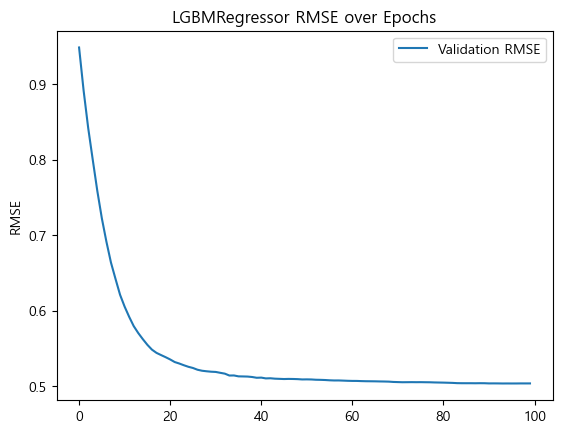

LGBM Best Epoch:  99


In [139]:
from lightgbm import LGBMRegressor, early_stopping
import matplotlib.pyplot as plt

# Initialize the model with verbosity settings
reg_lgbm = LGBMRegressor(verbose=-1)  # Set to -1 to suppress output, or a positive integer for verbosity
eval_set = [(X_val_processed, y_val)]  # Evaluation set for early stopping

# Fit the model with early stopping
reg_lgbm.fit(X_train_processed, y_train, eval_metric="rmse", eval_set=eval_set,
             callbacks=[early_stopping(stopping_rounds=10)])

# Accessing the RMSE values
results = reg_lgbm.evals_result_
epochs = len(results['valid_0']['rmse'])  # Adjust the key based on your evals_result structure
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['valid_0']['rmse'], label='Validation RMSE')
ax.legend()
plt.ylabel('RMSE')
plt.title('LGBMRegressor RMSE over Epochs')
plt.show()

# Best iteration
best_iteration = reg_lgbm.best_iteration_
print("LGBM Best Epoch: ", best_epoch)


# LGBM best_iteration으로 test 진행
LGBM Best Epoch:  25

In [140]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행
pred_test = reg_lgbm.predict(X_test, num_iteration=best_iteration)

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("LightGBM Test MSE: ", mse_test)
print("LightGBM Test R² Score: {:.2f}%".format(r2_test * 100))


LightGBM Test MSE:  0.21799019090643176
LightGBM Test R² Score: 80.18%
